# Modulação digital em banda base
### Objetivos:

Explicar como simular aspectos básicos de um sistema de comunicação digital em banda-base
> - Probabilidade de Erro ($P_{e}$) versus Taxa de Erro de Bit ($BER$)
> - Sinais ortogonais
> - Sinais antipodais
> - Sinais ortogonais vs sinais antipodais



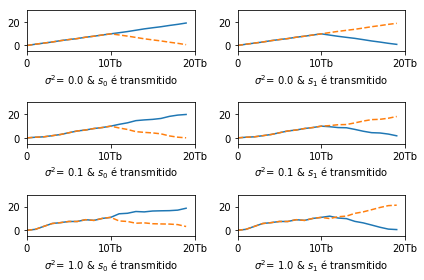

In [27]:
import numpy as np
import matplotlib.pyplot as plt

K = 20
A = 1
l = np.arange(0,K)
s_0 = np.ones(K)
s_1 = np.concatenate((A*np.ones(K//2),-A*np.ones(K//2)),axis=0)

r_0 = np.zeros(K)
r_1 = np.zeros(K)

variancia = np.array([0,0.1,1])
plt.figure(1)
for i in range(len(variancia)):
    noise = np.random.normal(0.0,np.sqrt(variancia[i])+0.1,K)
    s = s_0
    r = s + noise
    for n in range(K):
        r_0[n] = np.sum(r[0:n]*s_0[0:n])
        r_1[n] = np.sum(r[0:n]*s_1[0:n])

    plt.subplot(321+2*i)
    plt.xlabel('$\sigma^{2}$= ' +str(variancia[i]) +' & $s_{0}$ é transmitido')
    plt.plot(l,r_0,'-')
    plt.plot(l,r_1,'--')
    plt.xticks(np.array([0,10,20]),['0','10Tb','20Tb'])
    plt.axis([0,20,-5,30])
    
    s=s_1                                          
    r=s+noise                                          
    for n in range(K):
        r_0[n] = np.sum(r[0:n]*s_0[0:n])
        r_1[n] = np.sum(r[0:n]*s_1[0:n])
    plt.subplot(322+2*i)
    plt.xlabel('$\sigma^{2}$= ' +str(variancia[i]) +' & $s_{1}$ é transmitido')
    plt.plot(l,r_0,'-')
    plt.plot(l,r_1,'--')
    plt.xticks(np.array([0,10,20]),['0','10Tb','20Tb'])
    plt.axis([0,20,-5,30])

    
plt.tight_layout()
plt.show()

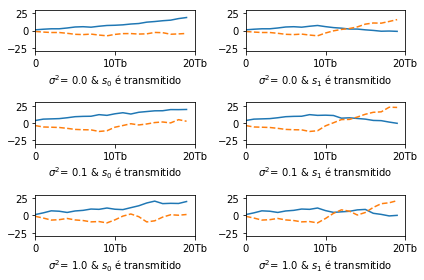

In [18]:
import numpy as np
import matplotlib.pyplot as plt

K = 20
A = 1
l = np.arange(0,K)
s_0 = np.ones(K)
s_1 = np.concatenate((A*np.ones(K//2),-A*np.ones(K//2)),axis=0)

r_0 = np.zeros(K)
r_1 = np.zeros(K)

variancia = np.array([0,0.1,1])
plt.figure(1)
for i in range(len(variancia)):
    noise = np.random.normal(0.0,np.sqrt(variancia[i])+0.1,K)
    s = s_0
    y = s + noise
    y_0 = np.convolve(y,np.flipud(s_0))
    y_1 = np.convolve(y,np.flipud(s_1))

    plt.subplot(321+2*i)
    plt.xlabel('$\sigma^{2}$= ' +str(variancia[i]) +' & $s_{0}$ é transmitido')
    plt.plot(l,y_0[l],'-')
    plt.plot(l,y_1[l],'--')
    plt.xticks(np.array([0,10,20]),['0','10Tb','20Tb'])
    plt.axis([0,20,-30,30])
    
    s = s_1
    y = s + noise
    y_0 = np.convolve(y,np.flipud(s_0))
    y_1 = np.convolve(y,np.flipud(s_1)) 
                                        

    plt.subplot(322+2*i)
    plt.xlabel('$\sigma^{2}$= ' +str(variancia[i]) +' & $s_{1}$ é transmitido')
    plt.plot(l,y_0[l],'-')
    plt.plot(l,y_1[l],'--')
    plt.xticks(np.array([0,10,20]),['0','10Tb','20Tb'])
    plt.axis([0,20,-30,30])

    
plt.tight_layout()
plt.show()

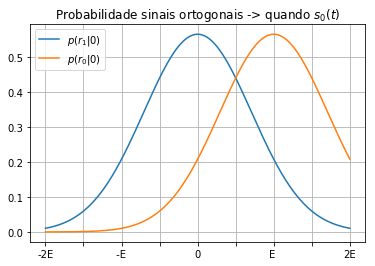

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mu_0=0
mu_1=1
var=0.5
x=np.arange(-2,2,0.001) 

## Cálculo da distribuição Gausiana
dist_norm_0=norm.pdf(x,mu_0,np.sqrt(var));                    # Distribuição prob s=s_{0}
dist_norm_1=norm.pdf(x,mu_1,np.sqrt(var));                    # Distribuição prob s=s_{1}

## Plotting
plt.plot(x,dist_norm_0,x,dist_norm_1)
plt.xticks(np.arange(-2,2.5,0.5),['-2E',' ',' -E ',' ','0',' ','E ',' ','2E'])
plt.title('Probabilidade sinais ortogonais -> quando $s_{0}(t)$')
plt.legend(['$p(r_{1}|0)$','$p(r_{0}|0)$'])
plt.grid()
plt.show()

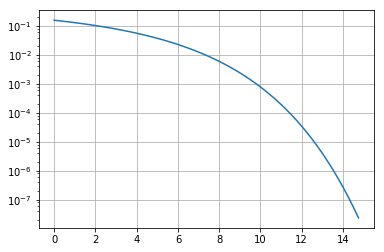

In [20]:
## Parâmetros

import numpy as np
import matplotlib.pyplot as plt 
import scipy.special

qfunc = lambda x: 0.5-0.5*scipy.special.erf(x/np.sqrt(2))

SNR_inicial=0                                        # SNR inicial
SNR_final=15                                     
SNR_passo=0.25                                    
SNR_dB= np.arange(SNR_inicial,SNR_final,SNR_passo)
Pe = np.zeros(len(SNR_dB))           
for i in range(len(SNR_dB)):
    snr=10**(SNR_dB[i]/10)
    Pe[i]=qfunc(np.sqrt(snr))

plt.semilogy(SNR_dB,Pe)
plt.grid()
plt.show()

In [21]:
Energia0=np.random.rand(5)
Energia1=np.random.rand(5)
Bit=Energia1<Energia0
print(Energia0)
print(Energia1)
print(Bit)

[ 0.86036468  0.379068    0.270177    0.15314352  0.96884265]
[ 0.22704939  0.03793135  0.72334001  0.21457755  0.4544884 ]
[ True  True False False  True]


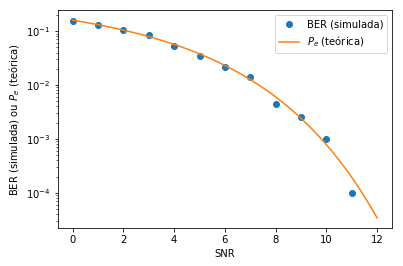

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

## Parâmetros
snr_in_dB=np.arange(0,13)                               # SNR em dB
nMCSamples = 10000                             # Número de amostras MMC
vtSNRTeo=np.arange(0,12+0.1,0.1)
dE = 1                                         # Energia do símbolo s0 e s1
dSNR = np.exp(snr_in_dB*np.log(10)/10)               # SNR em escala linear
dsgma = dE/np.sqrt(2*dSNR)                       # Desvio padrão do ruído
## Tranmissão 
vtBin = np.random.randint(2,size=nMCSamples)              # Geração dos números binários 0 e 1 com igual probabilidade
# Estima erro varrendo todos os valores de Snr
vtEnergiaRo = np.zeros(len(vtBin))
vtEnergiaR1 = np.zeros(len(vtBin))
vtSimError = np.zeros(len(snr_in_dB))

for ik in range(len(snr_in_dB)):
    vtIndex0 = np.where(vtBin == 0)[0]                    # Acha os índice de bits iguais a 0
    vtIndex1 = np.where(vtBin == 1)[0]                    # Acha os índice de bits iguais a 1


    # Dado que o ruído é de média zero e variancia dsgma^2, tem-se que 
    # r=média+dsgma*np.random.randn(.)= dsgma*np.random.randn(.)
    # Gera saida do correlator para cada entrada 0.
    vtEnergiaRo[vtIndex0] = dE + dsgma[ik]*np.random.randn(len(vtIndex0))   # Saída r0
    vtEnergiaR1[vtIndex0] = dsgma[ik]*np.random.randn(len(vtIndex0))        # Saída r1
    # Gera saida do correlator para cada entrada 1  
    vtEnergiaRo[vtIndex1] = dsgma[ik]*np.random.randn(len(vtIndex1))        # Saída r0
    vtEnergiaR1[vtIndex1] = dE + dsgma[ik]*np.random.randn(len(vtIndex1))   # Saída r1
    
    ## Detecção 
    vtBinDetec = vtEnergiaRo < vtEnergiaR1         # Detecção: 0 se, r0>r1; e 1, se r0<r1
    teste= np.where(vtBinDetec == True)[0]
    vtBinDetec = np.zeros(len(vtBin))
    vtBinDetec[teste] = 1
    ## Detecção de erro
    # Detecção de erros (soma dos vetores originais e detectados)
    # 0 + 0 = 0 (acerto)
    # 1 + 1 = 2 (acerto)
    # 0 + 1 = 1 (erro)
    # 1 + 0 = 1 (erro)
    vtError = vtBin + vtBinDetec
    nErrors = len(vtError == 1)
    nErrors= np.where(vtError == 1)[0]
    # Estimativa da probabilidade de erro, i.e., BER
    dBER = len(nErrors)/nMCSamples	  	     
    vtSimError[ik]=dBER
    ## Gera a curva teórica

vtTeoError = np.zeros(len(vtSNRTeo))
for ik in range(len(vtSNRTeo)):
    dSNR=np.exp(vtSNRTeo[ik]*np.log(10)/10)   
    
    vtTeoError[ik]=(1/2)*erfc(np.sqrt(dSNR)/np.sqrt(2))
## Plotting
plt.semilogy(snr_in_dB,vtSimError,'o')
plt.semilogy(vtSNRTeo,vtTeoError);
plt.legend(['BER (simulada)', '$P_{e}$ (teórica)'])
plt.xlabel('SNR')
plt.ylabel('BER (simulada) ou $P_{e}$ (teórica)')
plt.show()

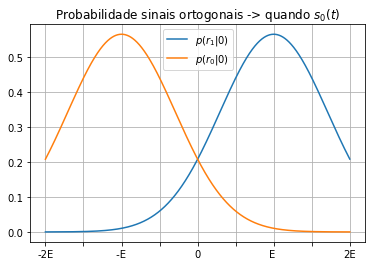

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mu_0=1
mu_1=-1
var=0.5
x=np.arange(-2,2,0.001) 

## Cálculo da distribuição Gausiana
dist_norm_0=norm.pdf(x,mu_0,np.sqrt(var));                    # Distribuição prob s=s_{0}
dist_norm_1=norm.pdf(x,mu_1,np.sqrt(var));                    # Distribuição prob s=s_{1}

## Plotting
plt.plot(x,dist_norm_0,x,dist_norm_1)
plt.xticks(np.arange(-2,2.5,0.5),['-2E',' ',' -E ',' ','0',' ','E ',' ','2E'])
plt.title('Probabilidade sinais ortogonais -> quando $s_{0}(t)$')
plt.legend(['$p(r_{1}|0)$','$p(r_{0}|0)$'])
plt.grid()
plt.show()

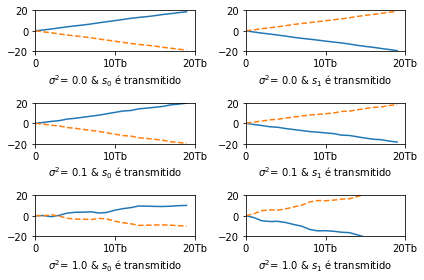

In [28]:
import numpy as np
import matplotlib.pyplot as plt

K = 20
A = 1
l = np.arange(0,K)
s_0 = A*np.ones(K)
s_1 = -s_0

r_0 = np.zeros(K)
r_1 = np.zeros(K)

variancia = np.array([0,0.1,1])
plt.figure(1)
for i in range(len(variancia)):
    noise = np.random.normal(0.0,np.sqrt(variancia[i])+0.1,K)
    s = s_0
    r = s + noise
    for n in range(K):
        r_0[n] = np.sum(r[0:n]*s_0[0:n])
        r_1[n] = np.sum(r[0:n]*s_1[0:n])

    plt.subplot(321+2*i)
    plt.xlabel('$\sigma^{2}$= ' +str(variancia[i]) +' & $s_{0}$ é transmitido')
    plt.plot(l,r_0,'-')
    plt.plot(l,r_1,'--')
    plt.xticks(np.array([0,10,20]),['0','10Tb','20Tb'])
    plt.axis([0,20,-20,20])
    
    s=s_1                                          
    r=s+noise                                          
    for n in range(K):
        r_0[n] = np.sum(r[0:n]*s_0[0:n])
        r_1[n] = np.sum(r[0:n]*s_1[0:n])
    plt.subplot(322+2*i)
    plt.xlabel('$\sigma^{2}$= ' +str(variancia[i]) +' & $s_{1}$ é transmitido')
    plt.plot(l,r_0,'-')
    plt.plot(l,r_1,'--')
    plt.xticks(np.array([0,10,20]),['0','10Tb','20Tb'])
    plt.axis([0,20,-20,20])

    
plt.tight_layout()
plt.show()

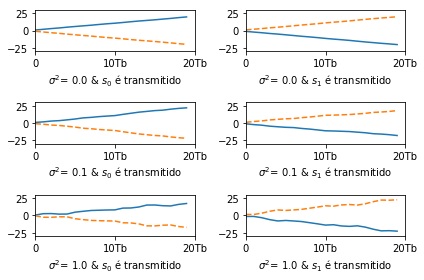

In [29]:
import numpy as np
import matplotlib.pyplot as plt

K = 20
A = 1
l = np.arange(0,K)
s_0 = A*np.ones(K)
s_1 = -s_0

r_0 = np.zeros(K)
r_1 = np.zeros(K)

variancia = np.array([0,0.1,1])
plt.figure(1)
for i in range(len(variancia)):
    noise = np.random.normal(0.0,np.sqrt(variancia[i])+0.1,K)
    s = s_0
    y = s + noise
    y_0 = np.convolve(y,np.flipud(s_0))
    y_1 = np.convolve(y,np.flipud(s_1))

    plt.subplot(321+2*i)
    plt.xlabel('$\sigma^{2}$= ' +str(variancia[i]) +' & $s_{0}$ é transmitido')
    plt.plot(l,y_0[l],'-')
    plt.plot(l,y_1[l],'--')
    plt.xticks(np.array([0,10,20]),['0','10Tb','20Tb'])
    plt.axis([0,20,-30,30])
    
    s = s_1
    y = s + noise
    y_0 = np.convolve(y,np.flipud(s_0))
    y_1 = np.convolve(y,np.flipud(s_1)) 
                                        

    plt.subplot(322+2*i)
    plt.xlabel('$\sigma^{2}$= ' +str(variancia[i]) +' & $s_{1}$ é transmitido')
    plt.plot(l,y_0[l],'-')
    plt.plot(l,y_1[l],'--')
    plt.xticks(np.array([0,10,20]),['0','10Tb','20Tb'])
    plt.axis([0,20,-30,30])

    
plt.tight_layout()
plt.show()

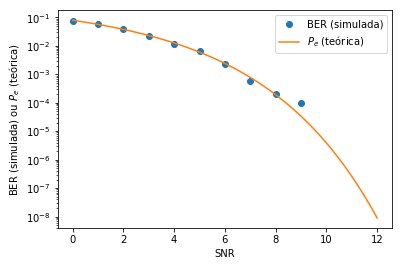

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

## Parâmetros
snr_in_dB=np.arange(0,13)                               # SNR em dB
nMCSamples = 10000                             # Número de amostras MMC
vtSNRTeo=np.arange(0,12+0.1,0.1)
dE = 1                                         # Energia do símbolo s0 e s1
dSNR = np.exp(snr_in_dB*np.log(10)/10)               # SNR em escala linear
dsgma = dE/np.sqrt(2*dSNR)                       # Desvio padrão do ruído
## Tranmissão 
vtBin = np.random.randint(2,size=nMCSamples)              # Geração dos números binários 0 e 1 com igual probabilidade
# Estima erro varrendo todos os valores de Snr
vtEnergiaR = np.zeros(len(vtBin))
vtSimError = np.zeros(len(snr_in_dB))

for ik in range(len(snr_in_dB)):
    vtIndex0 = np.where(vtBin == 0)[0]                    # Acha os índice de bits iguais a 0
    vtIndex1 = np.where(vtBin == 1)[0]                    # Acha os índice de bits iguais a 1


    # Dado que o ruído é de média zero e variancia dsgma^2, tem-se que 
    # r=média+dsgma*np.random.randn(.)= dsgma*np.random.randn(.)
    # Gera saida do correlator para cada entrada 0.
    vtEnergiaR[vtIndex0] = dE + dsgma[ik]*np.random.randn(len(vtIndex0))   # Saída r0
    # Gera saida do correlator para cada entrada 1  
    vtEnergiaR[vtIndex1] = -dE + dsgma[ik]*np.random.randn(len(vtIndex1))   # Saída r1
    
    ## Detecção 
    vtBinDetec = vtEnergiaR < 0         # Detecção: 0 se, r0>r1; e 1, se r0<r1
    ## Detecção de erro
    # Detecção de erros (soma dos vetores originais e detectados)
    # 0 + 0 = 0 (acerto)
    # 1 + 1 = 2 (acerto)
    # 0 + 1 = 1 (erro)
    # 1 + 0 = 1 (erro)
    vtError = vtBin + vtBinDetec
    nErrors= len(np.where(vtError == 1)[0])
    # Estimativa da probabilidade de erro, i.e., BER
    dBER = nErrors/nMCSamples	  	     
    vtSimError[ik]=dBER
    ## Gera a curva teórica

vtTeoError = np.zeros(len(vtSNRTeo))
for ik in range(len(vtSNRTeo)):
    dSNR=np.exp(vtSNRTeo[ik]*np.log(10)/10)   
    vtTeoError[ik]=(1/2)*erfc(np.sqrt(2*dSNR)/np.sqrt(2))
## Plotting
plt.semilogy(snr_in_dB,vtSimError,'o')
plt.semilogy(vtSNRTeo,vtTeoError);
plt.legend(['BER (simulada)', '$P_{e}$ (teórica)'])
plt.xlabel('SNR')
plt.ylabel('BER (simulada) ou $P_{e}$ (teórica)')
plt.show()
